In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2023-01-31 04:23:19--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-01-31 04:23:20--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf2f4476eeda78a62bc72f8fd34.dl.dropboxusercontent.com/cd/0/get/B1nhctVfVo5ThoobnHvjnnH5EK6VH500AP5hJnyYDHIK-URjRfcwWcX02_0iHqHs-3Ao59PGK6LeSstguA4bmY7ue2UubsPScM2ro-Ol8mfTdSYoJTj7pkJe_QZwTmF5HOJWTrNXCMrM5GDULkaJ4rxWG8yz5s3rSB80wHiZg8YDoNepU_kZwK2MvubEr-UZwoE/file?dl=1# [following]
--2023-01-31 04:23:20--  https://ucf2f4476eeda78a62bc72f8fd34.dl.dropboxusercontent.com/cd/0/get/B1nhctVfVo5T

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import re
import numpy as np
import os

from time import sleep
import time
import datetime
from urllib.parse import quote
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import pickle
from tqdm import tqdm
import os
from IPython.display import Image, IFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/부산 공모전/데이터/자연관광.xlsx')

In [ ]:
info = df[df['소분류 카테고리'] == '자연경관(하천/해양)']
info.head(2)

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,광안리해수욕장,부산광역시,수영구,부산 수영구 광안해변로 219-0,자연관광,자연경관(하천/해양),261818
1,2,해운대해수욕장,부산광역시,해운대구,부산 해운대구 해운대해변로 264-0,자연관광,자연경관(하천/해양),261722


In [ ]:
info[info['관광지명'] == '칠암방파제']

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
25,26,칠암방파제,부산광역시,기장군,부산 기장군,자연관광,자연경관(하천/해양),7577
41,42,칠암방파제,부산광역시,기장군,부산 기장군 문오성길 0-0,자연관광,자연경관(하천/해양),4452


In [ ]:
info.drop_duplicates(['관광지명'], inplace = True, ignore_index= True)

In [ ]:
info.shape

(109, 8)

In [ ]:
names = list(info['관광지명'].values)
names[:5]

['광안리해수욕장', '해운대해수욕장', '송정해수욕장', '다대포해수욕장', '송도해수욕장']

In [ ]:
info.to_csv('/content/drive/MyDrive/부산 공모전/데이터/자연관광 데이터/자연해양관광.csv', index = False)

In [ ]:
names = list(info['관광지명'].values)
names[:5]

['광안리해수욕장', '해운대해수욕장', '송정해수욕장', '다대포해수욕장', '송도해수욕장']

In [ ]:
busan_names = info['관광지명'].values
busan_names = ','.join(list(busan_names))

In [ ]:
busan_names

'광안리해수욕장,해운대해수욕장,송정해수욕장,다대포해수욕장,송도해수욕장,일광해수욕장,대변항,신선대부두,부산신항,부산항제5부두,임랑해수욕장,청사포방파제,동백섬,부산신항만,감만부두,천성항,가덕도,부산항제7부두,오륙도,학리방파제,감천중앙부두,장림포구,회동저수지,칠암방파제,대항방파제,감천항동방파제,새바지방파제,감천항,을숙도,감만시민부두,부산항제4부두,대변방파제,감천서편부두,이동방파제,부산항제8부두,감천항서방파제,문동방파제,이동항,감천동편부두,칠암항,죽성방파제,낫개방파제,문중방파제,부산항제1부두,길천방파제,온정방파제,영도신방파제,동명부두,다대포항,신감만부두,대항선착장,병산저수지,남부민방파제,중리방파제,월내방파제,미포항,외양포항,청사포,부산신항남컨테이너부두,월전방파제,두문방파제,동백항,학리항,외양포방파제,부산항제2부두,동암방파제,두송방파제,감만항,동암항,하리방파제,연꽃소류지,용호부두장치장,조도방파제,공수방파제,미포방파제,구덕포방파제,오륙도방파제,두호항,부산항제3부두,안평저수지,임랑방파제,공수항,월내항,부산항부두관리감천부두,동선방파제,선창선착장,눌차도,신호항,용호만매립부두,죽도,남항방파제,혈청소매립지방파제,해양대방파제,송도거북섬,송정항,용천저수지,우동항,신전항,다대항,송정방파제,신감만부두방파제,부산항,일자방파제,연안부두,북빈물량장대체부두,다대포방파제,신암항,북항대교방파제,구덕포항'

In [ ]:
mecab = Mecab()
mecab.nouns('송정해수욕장 근처 구덕포항파도가 엄청 높다.')

['송정', '해수욕장', '근처', '구덕', '포항', '파도']

In [ ]:
print(mecab.pos("해운대해수욕장 근처 구덕포항파도가 엄청 높다"))

[('해운대', 'NNG'), ('해수욕장', 'NNG'), ('근처', 'NNG'), ('구덕', 'NNG'), ('포항', 'NNP'), ('파도', 'NNG'), ('가', 'JKS'), ('엄청', 'MAG'), ('높', 'VA'), ('다', 'EC')]


## 불용어 및 정규화

In [ ]:
stopwords = [ '코스', '정도', '여기', '이곳', '하나', '다음', '때문', '가능', '궁사', '이번', '아래',
            '이름', '오늘', '난', '왼쪽', '광역시', '부산시', '부산', '부산광역시', '동쪽', '대항마',
            '호선', '부도', '공극', '공수', '샌드', '오랑', '코브', '제도', '볼락', '갈만', '건설',
            '오른쪽', '가운데', '마리', '채비', '하구', '방향',
            '지도','호수','일정', '기대', '롯데','월내', '파제', '드림', '가게', '민박', '암사',
            '소금', '학리', '분위기','시티투어','창고','부평','오전', '감만항', '나라', '회의',
            '조각','천마', '처가', '뒷산', '표지판','조각품', '주말','본가', '나들이','낙착', '부부',
            '후반', '가지', '초행길','마당쇠','포스팅','용기','얼마','태극', '감정', '초등','할은',
            '겁니다','안내', '반대편', '아미','괴정', '중심','갈래', '여긴','예비군','교장','중앙',
            '왕자', '감천동', '감내','국밥','돼지국밥', '공수항', '시랑','수영구', '조명',
            '바리스타','우사', '스틸', '배럴', '서생면', '진하', '울주군','맥주', '러스', '서생',
            '살모사', '앙장','공동', '남부민동', '남부민',
            '장작','방파', '분양','책임', '눌차도','고양이','공모전','지하철', '오후',
            '대변', '쓰시마','백제','감자','한국인', '신라','부흥', '노선','교육','수학',
            '동명', '누리','인어상', '공주','황옥','바퀴', '군청','평소','덕미','아난', '동암', '패스','브릭',
            '동암항','동용', '시랑리', '사찰', '어머니','지붕','두문', '지리산','소나무', '사이','황학','두호항','비치', '차크',
            '하임','문동','삼락', '강습','문중','젤라','시그','니엘', '벚꽃', '핑장', '골프', '글램','가구',
            '정관','초원', '베스트','경주','선석', '배후','물류','운영','개장','예정','부지', '매매', '확보','참여',
            '물동량','단지','크레인','포항','진해', '해저','근대', '당시', '작업','개최',
            '전화', '어디', '질문', '국가', '지질', '해설', '방면', '곳곳', '렌탈', '도시숲','제주도','뉴스',
            '스페리','타호','배편','산복도로','유엔군', '링크','워커','동구', '아크', '토닉',
            '제이드', '송혜교','량장','거북', '인용','송림','리호','운항','미르', '원투',
            '성대','능력','실시','중앙부','기능', '잡화', '전용','서포터', '원형', '신선대','선대',
            '신암항','해물','세차장','청소','영광', '터치','첫날','세차','최고','자동차','손세','올드','창회','타운','신전항',
            '밑반찬','여행길','넘버원','코로나','예방','명장', '차장','그램','매너','갈미','샤브샤브','카카오','오이','신호대교',
            '하굿둑', '산업단지','녹산', '시대','종주','오산','민물','오르막','아홉산', '일차','철마산','금정산','임도','중봉',
            '이정표','용소','산성고개','갈림길','곰내재','우측','미터','백양산','옥녀봉','좌측','금천','마무리',
            '두구동','소류지','구동','의원','선두','백련','배스','조정','연안부두','인천항',
            '여수','콜택시','장거리','중국','차이나타운','전국','마리니','블로그','깡깡이','영도신방파제', '구독','개인',
            '근교','유리','덧신','바릇','온정방파제','헤이든','탱자','온정',
            '대항동','외양포항','코모도','우물','뭔가','헤르베르트','소짜','캐나다','레이크',
            '캐빈','요금','최치원','보림','시기','날파리','루이스','결제','용호','치즈','매립','언양',
            '장치장','생략','전당','진호','우동항','확인','불가','마도로스',
            '월내역','동해선','월내항','카운티','이후','크림','월전','핑크','도래지','하단동','회관','비행기','이동항',
            '찐빵','전복','일자','박태준','웨이브', '임랑리', '장림포구', '부네', '치아','장림', '베네치아',
            '속초', '조도','정자','중리','김밥','성게', '천성항', '기차', '편도','장면','우도','하리','청송',
            '회룡', '판문점', '촬영소','학리방파제', '야외','테이블', '포차', '양념', '라면','렌트카','라티', '학리항','렌트',
            '픽업','차량','양대','캠퍼스','아치','패총','교통편','파라솔','파크','입장료','제휴','혈청소매립지방파제','관광지',
           '도베','스테이션','입장','회동','수원지','오륜','회동저수지','상현','황토','오리','선유','도원','선동','오륜동', '오랜만']

In [ ]:
with open('/content/drive/MyDrive/부산 공모전/데이터/notuse3.txt', 'r') as f:
    list_file = f.readlines()
stopwords = set(list_file[0].split(","))

In [ ]:
len(stopwords)

673

In [ ]:
def text_processing(busan):
    #텍스트 정제
    texts = str(busan.iloc[0].values)
    texts = re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", texts)

    #단어 정규화
    texts = texts.replace('애견', '반려동물')
    texts = texts.replace('고양이', '반려동물')
    texts = texts.replace('강아지', '반려동물')
    texts = texts.replace('장어구이', '장어')
    texts = texts.replace('출발점', '출발')
    texts = texts.replace('까페', '카페')
    texts = texts.replace('할매', '할머니')
    texts = texts.replace('와이프', '아내')
    texts = texts.replace('배낚시', '낚시')
    texts = texts.replace('바다낚시', '낚시')

    #형태소 분석 및 명사 추출
    mecab = Mecab()
    words = mecab.nouns(texts)

    # 한 글자 불용어처리
    words = [x for x in words if (len(x) > 1) or (x in ["땅", "굴", "꽃", "뷰", "봄", "밤",
                                                        '별','곶','땀','말','벼','밭','논','빛','산','숲','섬','흙', '배'])]

    # 불용어
    stopword = stopwords
    words = [x for x in words if x not in stopword]

    # 뽑은 단어 저장
    with open(f'/content/drive/MyDrive/부산 공모전/데이터/자연관광 데이터/realpickles/{busan.columns[0]}_words.pkl','wb') as f:
        pickle.dump(words,f)

    # 빈도수 계산해서 딕셔너리 만들기
    words = sorted(Counter(words).items(), key = lambda x: x[1], reverse = True)

    # 탑50 단어만 뽑기
    top50 = words[:50]
    top50 = list(dict(top50).keys())

    return top50

## 키워드 추출

In [ ]:
path = "/content/drive/MyDrive/부산 공모전/데이터/자연관광 데이터/장소/"
file_list = sorted(os.listdir(path))
file_list[:5]

['가덕도.csv',
 '감만부두.csv',
 '감만시민부두.csv',
 '감만항.csv',
 '감천동편부두.csv']

In [ ]:
top50s = []

for file in tqdm(file_list):
    place = pd.read_csv(path + file, encoding = 'utf-8')
    top50s = top50s + text_processing(place)
totaltop50 = sorted(Counter(top50s).items(), key = lambda x: x[1], reverse = True)

100%|██████████| 109/109 [00:54<00:00,  2.02it/s]


In [ ]:
# 저장
with open('/content/drive/MyDrive/부산 공모전/데이터/자연관광 데이터/realpickles/totaltop50.pkl','wb') as f:
      pickle.dump(totaltop50,f)

In [ ]:
# 읽기
with open(f'/content/drive/MyDrive/부산 공모전/데이터/자연관광 데이터/realpickles/totaltop50.pkl','rb') as f:
    tmp = pickle.load(f)
tmp

[('사진', 102),
 ('생각', 99),
 ('공원', 98),
 ('마을', 87),
 ('카페', 84),
 ('풍경', 79),
 ('말', 78),
 ('배', 73),
 ('대교', 73),
 ('전망대', 71),
 ('시장', 68),
 ('맛집', 65),
 ('버스', 64),
 ('구경', 63),
 ('뷰', 61),
 ('산', 59),
 ('문화', 58),
 ('등대', 57),
 ('친구', 57),
 ('느낌', 57),
 ('호텔', 55),
 ('날씨', 54),
 ('숙소', 54),
 ('산책', 54),
 ('섬', 49),
 ('근처', 48),
 ('아침', 48),
 ('낚시', 47),
 ('커피', 46),
 ('하늘', 46),
 ('야경', 44),
 ('산책로', 41),
 ('바람', 39),
 ('장소', 37),
 ('마음', 37),
 ('다리', 36),
 ('관광', 36),
 ('명소', 33),
 ('주문', 33),
 ('밤', 33),
 ('저녁', 32),
 ('가족', 31),
 ('아이', 30),
 ('계단', 30),
 ('국제', 29),
 ('저희', 28),
 ('스카이', 28),
 ('파도', 27),
 ('예약', 26),
 ('투어', 26),
 ('영화', 26),
 ('체험', 25),
 ('도로', 25),
 ('일출', 24),
 ('축제', 24),
 ('촬영', 23),
 ('식사', 23),
 ('마지막', 23),
 ('바닷가', 23),
 ('식당', 22),
 ('역사', 21),
 ('이야기', 21),
 ('달맞이', 20),
 ('박물관', 19),
 ('낙동강', 19),
 ('여울', 19),
 ('자연', 19),
 ('바위', 18),
 ('횟집', 18),
 ('구이', 18),
 ('터미널', 17),
 ('음식', 17),
 ('태종대', 16),
 ('오션', 16),
 ('케이블카', 15),
 ('포토', 15),
 ('드

In [ ]:
path = "/content/drive/MyDrive/부산 공모전/데이터/자연관광 데이터/realpickles/"
file_list = sorted(os.listdir(path))[1:]
file_list[0]

'가덕도_words.pkl'

In [ ]:
def count_words(place):
    words = place

    # 빈도수 계산해서 딕셔너리 만들기
    words = sorted(Counter(words).items(), key = lambda x: x[1], reverse = True)

    with open(f'/content/drive/MyDrive/부산 공모전/데이터/자연관광 데이터/nounsdict/{file[:-10]}.pkl','wb') as f:
         pickle.dump(words,f)

In [ ]:
for file in tqdm(file_list):
    with open(f'/content/drive/MyDrive/부산 공모전/데이터/자연관광 데이터/realpickles//{file}','rb') as f:
        place = pickle.load(f)
        count_words(place)

100%|██████████| 109/109 [00:01<00:00, 61.84it/s]


In [ ]:
with open('/content/drive/MyDrive/부산 공모전/데이터/자연관광 데이터/nounsdict/광안리해수욕장.pkl','rb') as f:
        place = pickle.load(f)
place[:10]

[('대교', 229),
 ('사진', 225),
 ('야경', 138),
 ('숙소', 132),
 ('공원', 104),
 ('카페', 100),
 ('생각', 98),
 ('밤', 83),
 ('축제', 80),
 ('풍경', 78)]

## 딕셔너리 만들기

In [ ]:
keydict = {}
for file in names:
  with open(f'/content/drive/MyDrive/부산 공모전/데이터/자연관광 데이터/nounsdict/{file}.pkl','rb') as f:
    place = pickle.load(f)
    place = place[:5]
    keydict[file] = place

In [ ]:
len(keydict)

109

In [ ]:
with open('/content/drive/MyDrive/부산 공모전/데이터/keywordsdict.pkl','wb') as f:
  pickle.dump(keydict,f)

In [ ]:
with open('/content/drive/MyDrive/부산 공모전/데이터/keywordsdict.pkl','rb') as f:
  keywordsdict = pickle.load(f)

In [ ]:
keywordsdict

{'광안리해수욕장': [('대교', 229), ('사진', 225), ('야경', 138), ('숙소', 132), ('공원', 104)],
 '해운대해수욕장': [('축제', 204), ('모래', 187), ('사진', 168), ('호텔', 117), ('빛', 106)],
 '송정해수욕장': [('열차', 242), ('서핑', 172), ('토스트', 172), ('사진', 131), ('카페', 128)],
 '다대포해수욕장': [('사진', 282), ('일몰', 275), ('공원', 136), ('분수', 95), ('생각', 87)],
 '송도해수욕장': [('케이블카', 358),
  ('사진', 151),
  ('구름다리', 130),
  ('공원', 127),
  ('산책로', 116)],
 '일광해수욕장': [('카페', 200), ('사진', 185), ('맛집', 140), ('뷰', 99), ('생각', 85)],
 '대변항': [('멸치', 501), ('사진', 111), ('맛집', 106), ('등대', 98), ('횟집', 85)],
 '신선대부두': [('공원', 215), ('대교', 185), ('야경', 155), ('사진', 142), ('버스', 134)],
 '부산신항': [('마을', 285), ('공원', 213), ('전망대', 201), ('문화', 155), ('대교', 151)],
 '부산항제5부두': [('태종대', 46), ('영화', 33), ('성당', 31), ('공원', 30), ('시장', 29)],
 '임랑해수욕장': [('카페', 183), ('사진', 160), ('아이', 83), ('생각', 73), ('뷰', 63)],
 '청사포방파제': [('전망대', 266),
  ('열차', 244),
  ('사진', 238),
  ('다릿돌', 197),
  ('스카이', 197)],
 '동백섬': [('사진', 208), ('산책', 193), ('마루', 163), ('하우스', 

## 워드클라우드

In [ ]:
# 폰트 설치용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import matplotlib
get_ipython().run_line_magic('config', "InlineBackend.figure_format='retina' #화질 좋게 해주기")

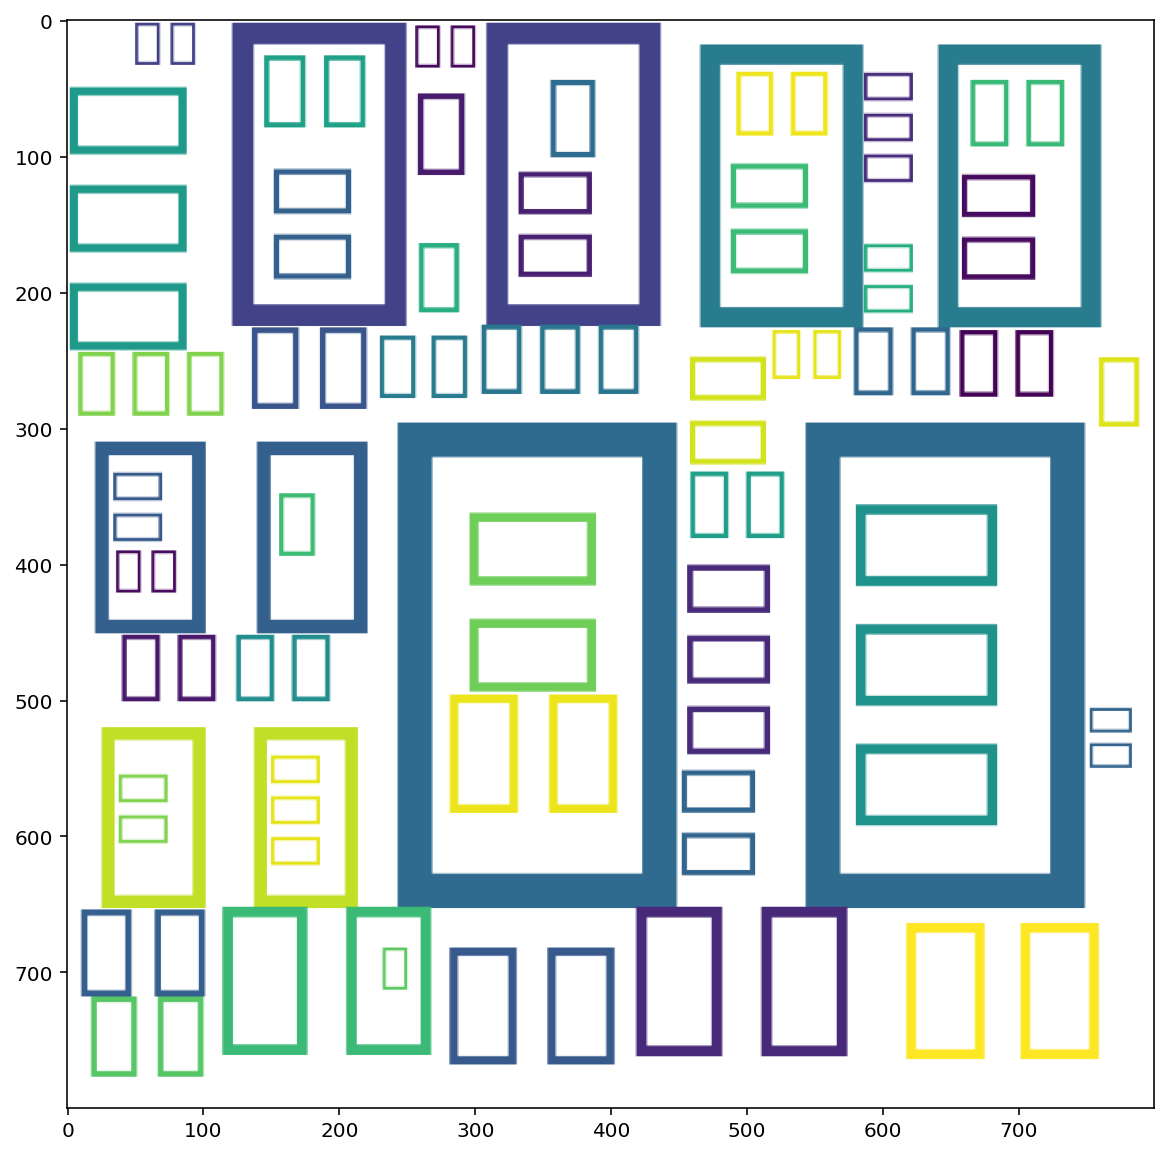

In [ ]:
with open('/content/drive/MyDrive/부산 공모전/데이터/자연관광 데이터/nounsdict/가덕도.pkl', 'rb') as f:
            text = pickle.load(f)
            clouds = text[:50]
            wc = WordCloud( width=400, height=400, scale=2.0, max_font_size=250,
                           background_color='white')
            gen = wc.generate_from_frequencies(dict(clouds))
            plt.figure(figsize=(10,10))
            plt.imshow(gen)